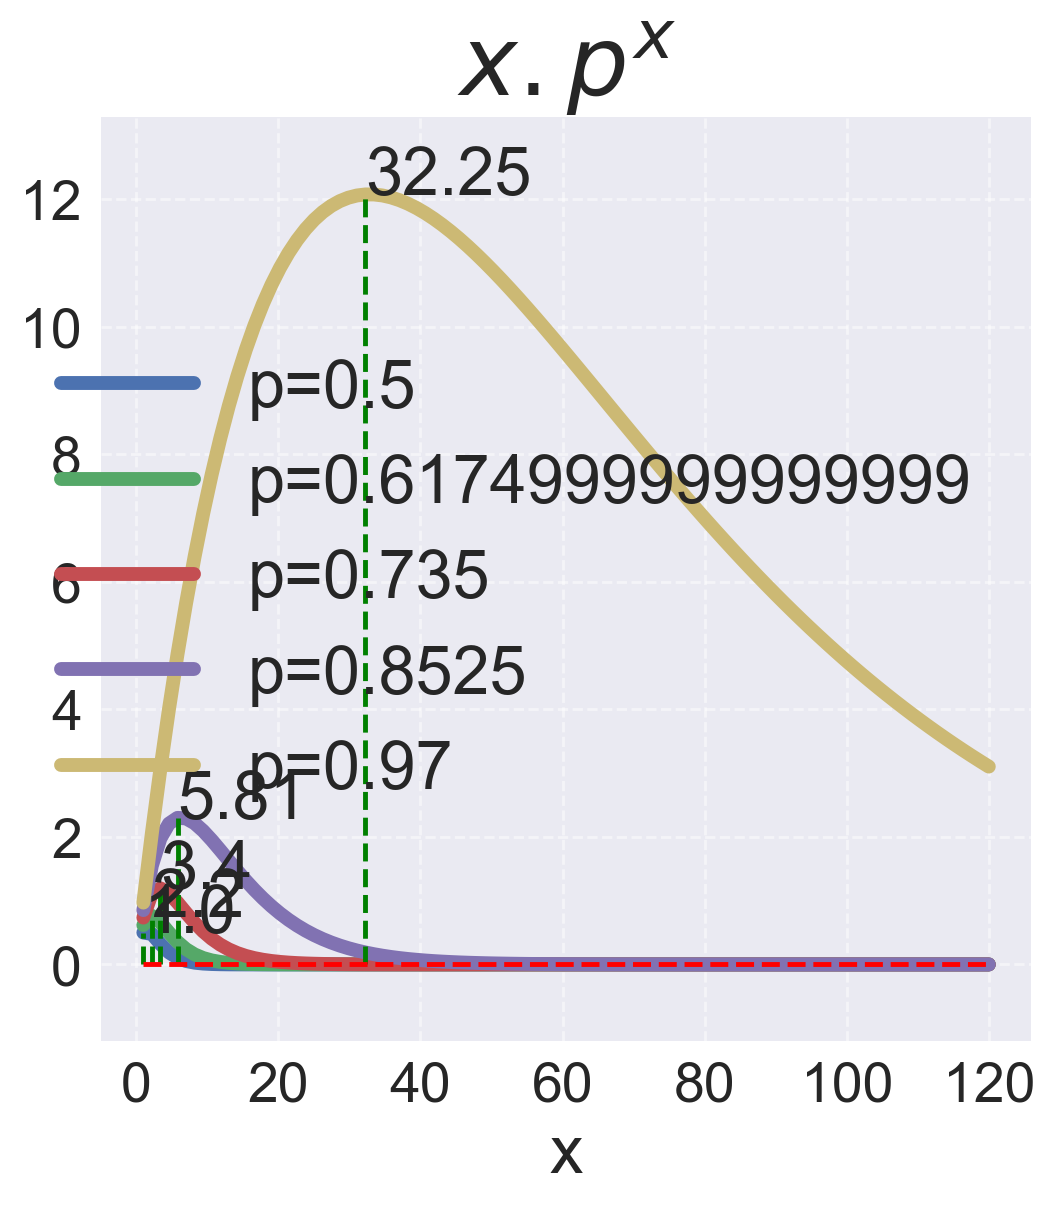

In [4]:
import numpy as np
import matplotlib.pyplot as plt

msg_nr = 120
ps = np.linspace(.5, .97, 5)
plt.style.use(plt.style.available[11])
plt.figure(figsize=(6, 6), dpi=200)

for p in ps:
    x = np.linspace(1, msg_nr, 100)
    y = x*p**(x)
    plt.plot(x, y, label='p={}'.format(p), linewidth=5)
    y_max = np.max(y)
    plt.vlines(x[np.argmax(y)], 0, y_max, colors='g', linestyles='dashed')
    plt.text(x[np.argmax(y)] , y_max, '{}'.format(np.round(x[np.argmax(y)],2)), fontsize=24)

plt.hlines(0, 1, msg_nr, colors='r', linestyles='dashed')
plt.title(r'$x.p^x $', fontsize=35)
plt.xlabel('x', fontsize=24)

plt.legend(fontsize=24)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0-y_max*0.1, y_max*1.1)
plt.show()


